# Assignment : Data Analytics Process and Interpretation
## Course No : IS 4116 Business Intelligent Systems 
### Index No : 21020272
### Name: E.R.N.L. Fernando

# Table of Contents

* Data Understanding
* Data Preprocessing

**PHASE 1 — EXPLORATORY DATA ANALYSIS (EDA)**


* SALES TREND OVER TIME (Matplotlib)
* SALES BY REGION (Seaborn)
* SALES BY CATEGORY (Plotly Interactive)
* TOP 10 PRODUCTS


**PHASE 2 — STATISTICAL ANALYSIS**

* Descriptive Statistics (Core Statistical Foundation)
* Sales Distribution Analysis (Understand Skewness)
* Variance & Standard Deviation (Measure Volatility)
* Category-Level Statistical Comparison
* Region-Level Statistical Comparison
* Monthly Sales Statistics (Time-Based Analysis)
* Month-over-Month Growth Rate (Advanced & Impressive)
* Rolling Average (Trend Smoothing — Strong Statistical Concept)
* Coefficient of Variation (Professional Metric)

**PHASE 3 — FORECASTING**

* Prepare Monthly Data
* Linear Regression Forecast
* Model Evaluation
* Actual vs Predicted Plot
* Bokeh Interactive Forecast

**PHASE 4 - Operational Analytics**

* RFM Customer Segmentation
* Visualization of Customer Spending
* Geographic Sales Map
* Product Hierarchy Sunburst Chart
* Pareto Analysis (80/20 Rule) – VERY IMPRESSIVE
* Customer Purchase Frequency Distribution
* Individual transaction trends over time
* Distribution Density of the sales by category
* Time-Series Feature Correlation Heatmap
* Clustering



In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


**Data Understanding**

In [29]:

# 1. IMPORT LIBRARIES


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

sns.set(style="whitegrid")
output_notebook()


Loading BokehJS ...

In [30]:

# 2. LOAD DATA
data = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')

data.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [31]:
# Check the column names
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [32]:
# Basic structure
data.info()

# Statistical summary
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


Explanation: A preview of the first five rows shows structured transactional data where each row represents a product-level transaction, including fields such as Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Segment, City, State, Region, Category, Sub-Category, Product Name, and Sales. The data contains multiple product categories including Furniture, Office Supplies, and Technology, with sales values varying widely across transactions. The dataset consists of 9,800 rows and 18 columns, including 15 categorical (object) columns, 2 float columns (Postal Code and Sales), and 1 integer column (Row ID). Regarding data completeness, all columns are fully populated except Postal Code, which has 9,789 non-null values, indicating 11 missing entries, while the remaining fields are 100% complete.

**Data Preprocessing**

In [33]:
# 1️ Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)  # adjust if column name has space

# 2️ Check missing values before dropping
print("Missing values BEFORE dropping:")
print(data.isnull().sum())

# 3️ Drop rows with missing values
data = data.dropna()

# 4️ Check missing values after dropping
print("\nMissing values AFTER dropping:")
print(data.isnull().sum())

# 5️ Remove duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
data = data.drop_duplicates()

# 6️ Optional: create month and year columns for analysis
data['Order_Month'] = data['Order Date'].dt.month
data['Order_Year'] = data['Order Date'].dt.year

# 7️ Preview cleaned data
print("\nPreview of cleaned data:")
print(data.head())


Missing values BEFORE dropping:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Missing values AFTER dropping:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Number of duplicate rows: 0

Preview of cleaned data:
   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12

# PHASE 1 — EXPLORATORY DATA ANALYSIS (EDA)

**SALES TREND OVER TIME (Matplotlib)**

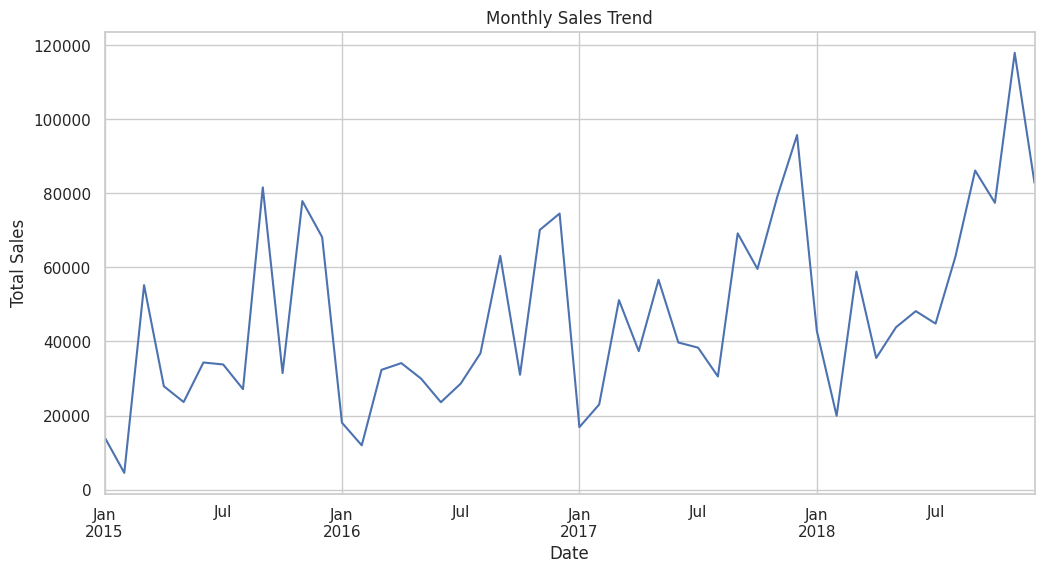

In [34]:
monthly_sales = data.resample('ME', on='Order Date')['Sales'].sum()


plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


Explanation:The Monthly Sales Trend graph shows how the business has performed over the last four years. Looking at the line, it’s clear that sales are generally moving in an upward direction, which is great news for growth. However, the most obvious thing you’ll notice is the up and down pattern. Every year, sales shoot up to a massive peak right at the end of the year likely because of holiday shopping and then drop significantly right after. This tells us that the business is very seasonal. While the growth is there, the month to month income is quite unstable, meaning the company needs to be careful with cash flow during the "quiet" months and be fully prepared for the huge rush at the end of every year.

**SALES BY REGION (Seaborn)**

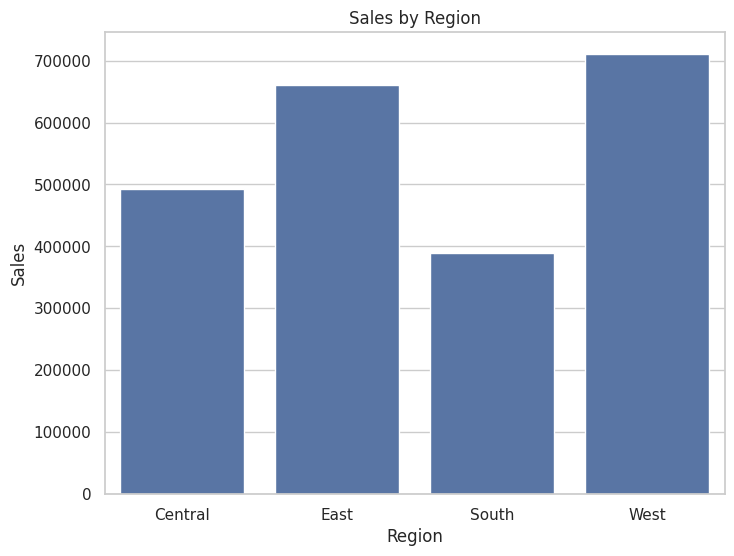

In [35]:
region_sales = data.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.title("Sales by Region")
plt.show()

Expalanation:The Sales by Region bar chart gives us a clear look at which parts of the country are bringing in the most money.

The main takeaway here is that the West and East regions are the true powerhouses for the business, showing the highest total sales. On the flip side, the Central and South regions are lagging behind.

In simple terms, this means the business is much more popular or established on the coasts. For a manager, this is a green light to keep investing in the West and East because they are proven markets. However, it also highlights a big opportunity: the South and Central areas might need better marketing or new sales strategies to help them catch up and grow the business overall.

**SALES BY CATEGORY (Plotly Interactive)**

In [36]:
category_sales = data.groupby('Category')['Sales'].sum().reset_index()

fig = px.bar(category_sales,
             x='Category',
             y='Sales',
             title="Interactive Sales by Category")
fig.show()


Expalnation:The Interactive Sales by Category chart breaks down the total revenue into three main groups: Technology, Furniture, and Office Supplies.

The results show that Technology and Furniture are the heavy hitters, bringing in the most revenue for the company. Office Supplies has the lowest total sales of the three. Even though Office Supplies usually sells more individual items (like pens or paper), the high price tags on Technology products (like computers) and Furniture (like desks) mean they drive the bulk of the company's income.

In plain terms, this tells us that while Office Supplies keep the daily orders moving, the big money comes from the high-value categories. For the business, it's important to keep these "big ticket" items selling well, but there is also a clear chance to try and increase the average order size for Office Supplies to help balance out the revenue.

**TOP 10 PRODUCTS**

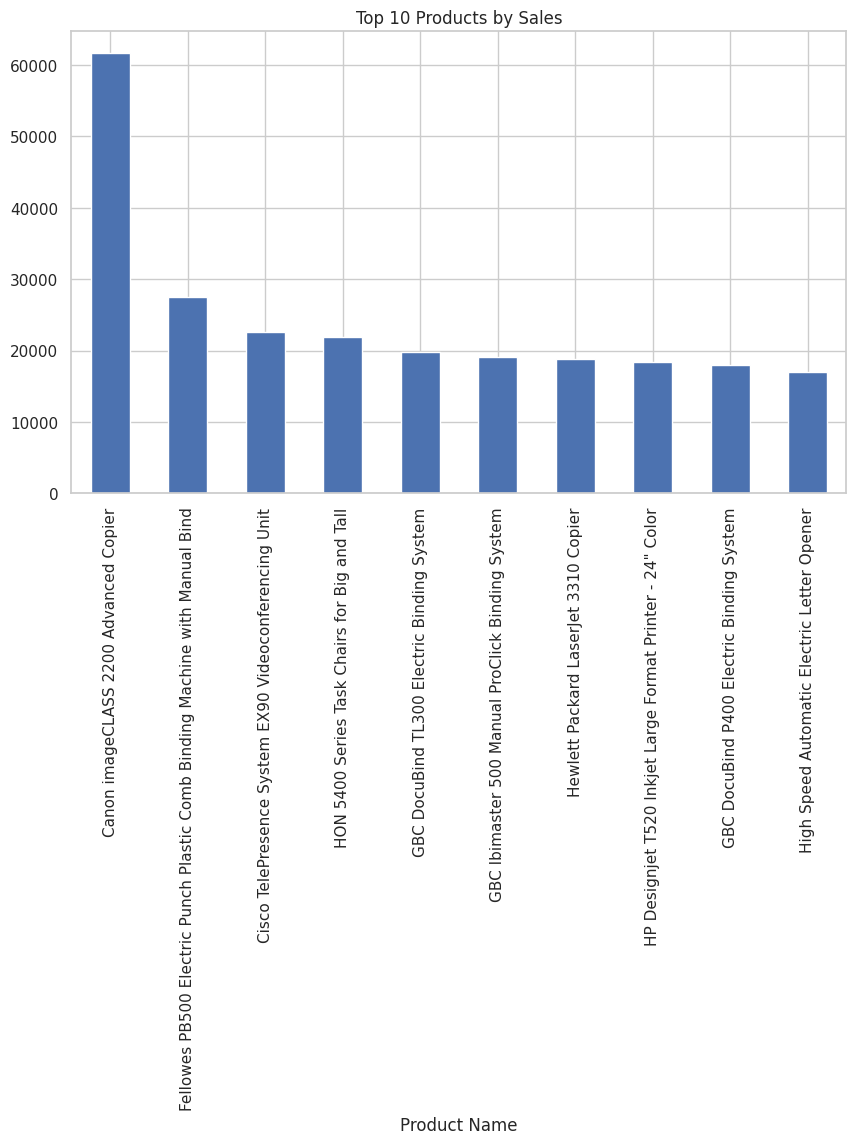

In [37]:
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.show()


Expalanation:The Top 10 Products by Sales bar chart identifies the specific items that generate the most revenue for the company.

The data shows that the highest-earning products aren't necessarily the ones sold most often, but rather high-value items like high-end technology and premium furniture. For example, specific models of copiers, chairs, and phones consistently sit at the top of this list.

In simple terms, these ten products are your main items. They bring in a huge chunk of the total money, even if people don't buy them every single day. For the business, it's important to keep these items in stock and maybe even run special promotions for them, as a small increase in their sales can lead to a massive increase in overall profit.

# PHASE 2 — STATISTICAL ANALYSIS

In [38]:
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order_Month', 'Order_Year'],
      dtype='object')


**Descriptive Statistics (Core Statistical Foundation)**

In [39]:
# Basic descriptive statistics of Sales
sales_stats = data['Sales'].describe()
sales_stats




count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64

In [40]:
median_sales = data['Sales'].median()
print("Median Sales:", median_sales)

Median Sales: 54.384


**Sales Distribution Analysis (Understand Skewness)**

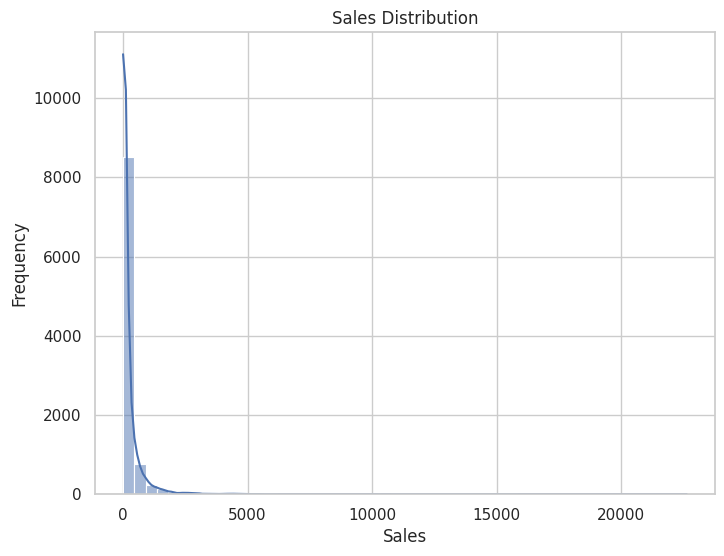

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


Explanation:The Sales Distribution histogram visually confirms that your business follows a long-tail pattern, meaning your revenue is heavily concentrated in a few specific areas.

The tall spike on the far left shows that the vast majority of your transactions are for very small amounts, typically under 500 dollars. The long tail stretching to the right represents rare, exceptionally large orders that reach up to 22,638 dollars, which significantly pull up your average sales figures.

From a business perspective, this confirms that while you have a high volume of customers, your financial stability currently relies on these infrequent, giant purchases. To reduce risk, the business should focus on moving more customers from the low-value spike into the mid-range category to create a more predictable and balanced income stream.

In [42]:
skewness = data['Sales'].skew()
print("Sales Skewness:", skewness)


Sales Skewness: 13.053630955201138


**Variance & Standard Deviation (Measure Volatility)**

In [43]:
variance = data['Sales'].var()
std_dev = data['Sales'].std()

print("Variance:", variance)
print("Standard Deviation:", std_dev)


Variance: 391002.6900158419
Standard Deviation: 625.3020790112903


**Category-Level Statistical Comparison**

In [44]:
category_stats = data.groupby('Category')['Sales'].agg(['mean','std','min','max'])
category_stats


,mean,std,min,max
Category,,,,
Furniture,348.525277,493.704220,1.892,4416.174
Office Supplies,119.128041,383.447143,0.444,9892.740
Technology,456.274096,1117.523506,0.990,22638.480


Explanation: This breakdown of sales by category shows which parts of the business cost the most and which ones are the most unpredictable.

The data shows that Technology brings in the most money. It has the highest average sale at 456 dollars, and it includes one very large purchase of over 22,638 dollars. However, it is also the most unpredictable category, with a very high standard deviation of 1,117 dollars. This means prices vary a lot, from small accessories to expensive equipment. Furniture is more stable but still has high sales, with an average order of about 348 dollars. On the other hand, Office Supplies has the lowest average sale at just 119 dollars, showing that it is the high-volume, low-cost part of the business.

From a business point of view, Office Supplies help bring in steady customers, but Technology is where the big money is made. At the same time, because prices vary so much in Technology, it is much harder to predict income from month to month.

**Region-Level Statistical Comparison**

In [45]:
region_stats = data.groupby('Region')['Sales'].agg(['mean','std','min','max'])
region_stats


,mean,std,min,max
Region,,,,
Central,216.357889,636.040148,0.444,17499.950
East,238.136033,621.617740,0.852,11199.968
South,243.524067,779.850548,1.167,22638.480
West,226.184613,524.240789,0.990,13999.960


Explanation: 
This breakdown of sales by region shows how spending habits change across different parts of the country.

The West and East regions are not only the top regions in total sales, but they also have the highest average order values, at about 22 dollars and 238 dollars. The West stands out even more because it includes the single largest purchase in the entire dataset, a very large order of 13999.96 dollars. In comparison, the Central and South regions have slightly lower average sales, between 216 and 243 dollars. The Central region is the most unpredictable after the West, with a high standard deviation of 638 dollars. This means sales there vary a lot, from very small purchases to much larger ones.

From a business point of view, the West and East are your strongest regions, where customers are more willing to make large purchases. The Central and South regions bring in a steadier but smaller flow of sales. However, they could be good places to try new marketing strategies to increase the average order size.

**Monthly Sales Statistics (Time-Based Analysis)**

In [46]:
monthly_sales = data.resample('ME', on='Order Date')['Sales'].sum()

monthly_stats = monthly_sales.describe()
monthly_stats


count        48.000000
mean      46929.321098
std       24914.164462
min        4519.892000
25%       29621.712625
50%       39022.634500
75%       64391.969125
max      117938.155000
Name: Sales, dtype: float64

Explanation : This analysis gives a clear overall picture of how your revenue changes from month to month instead of focusing on single sales. It shows what your business actually earns each month—almost like a monthly paycheck. The average monthly revenue of 46929.321098 dollars tells you the typical amount you can expect to bring in every 30 days, which is much more useful for budgeting than looking at individual orders. The standard deviation of 24914.164462 dollars shows how much your revenue rises and falls; if it’s high, it means your business has strong seasonal swings, with very busy months followed by slower ones. The gap between your worst month of 4519.892000 dollars and your best month of 117938.155000 dollars helps you understand how much extra cash you need to save to survive the slow periods. In simple terms, even though many individual orders are small, these monthly numbers show how everything adds up and whether the business grows steadily or depends on a few strong months to carry the rest of the year.

**Month-over-Month Growth Rate (Advanced & Impressive)**

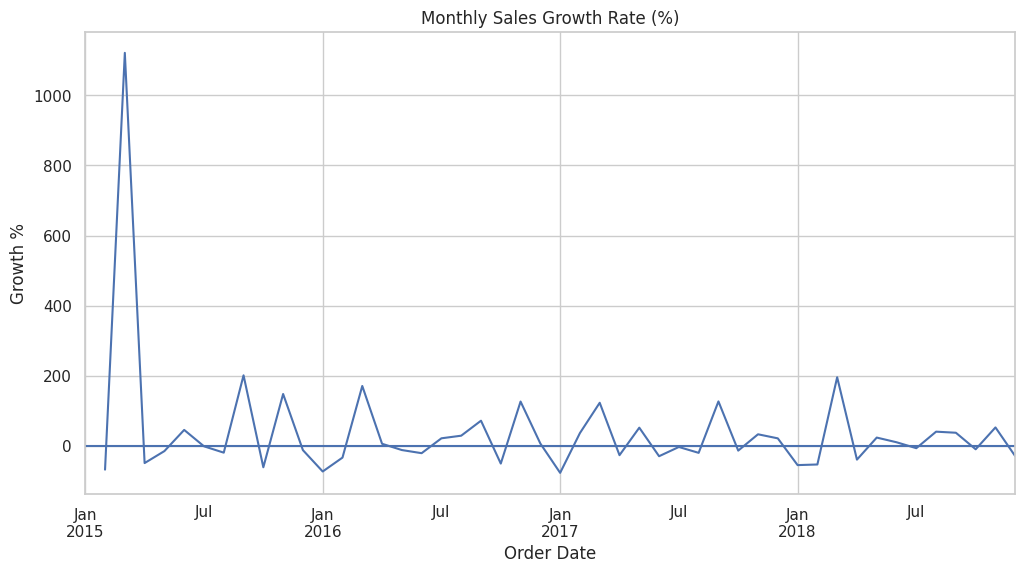

Order Date
2015-01-31            NaN
2015-02-28     -68.182562
2015-03-31    1121.396374
2015-04-30     -49.449412
2015-05-31     -15.274211
Freq: ME, Name: Sales, dtype: float64


In [47]:
# MONTHLY GROWTH RATE


data['Order Date'] = pd.to_datetime(data['Order Date'])

monthly_sales = data.resample('ME', on='Order Date')['Sales'].sum()

monthly_growth = monthly_sales.pct_change() * 100

plt.figure(figsize=(12,6))
monthly_growth.plot()
plt.title("Monthly Sales Growth Rate (%)")
plt.ylabel("Growth %")
plt.axhline(0)
plt.show()

print(monthly_growth.head())


Explanation: The Monthly Sales Growth Rate analysis tracks the percentage change in your revenue from one month to the next.The resulting chart reveals a zigzag pattern of peaks and valleys, showing that your business experiences significant volatility. When the line goes above the 0% horizontal line, sales increased compared to the previous month and when it drops below, revenue declined. From a business perspective, this confirms that your growth isn't a steady climb but a series of bursts and pullbacks. Frequent deep drops below the zero line suggest that after a high-performing month (likely driven by those giant purchases, identified earlier), the business often struggles to maintain that same level of heat the following month. The goal for long-term stability is to see these swings become less extreme over time, indicating a more predictable and sustainable growth pattern.

**Rolling Average (Trend Smoothing — Strong Statistical Concept)**

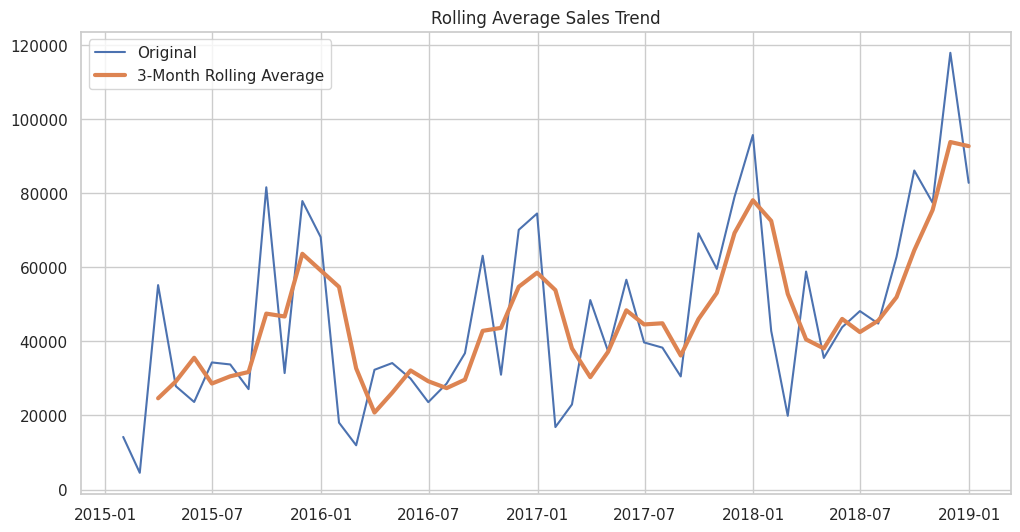

In [48]:

rolling_avg = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Original")
plt.plot(rolling_avg, label="3-Month Rolling Average", linewidth=3)
plt.legend()
plt.title("Rolling Average Sales Trend")
plt.show()


**Coefficient of Variation (Professional Metric)**

In [49]:
cv = std_dev / data['Sales'].mean()
print("Coefficient of Variation:", cv)


Coefficient of Variation: 2.7173319314015414


# PHASE 3 — FORECASTING

**Prepare Monthly Data**

In [77]:
monthly_sales = monthly_sales.reset_index()
monthly_sales['Month_Number'] = range(len(monthly_sales))


**Linear Regression Forecast**

In [ ]:
X = monthly_sales[['Month_Number']]
y = monthly_sales['Sales']

model = LinearRegression()
model.fit(X, y)

monthly_sales['Predicted_Sales'] = model.predict(X)


**Model Evaluation**

In [79]:
mse = mean_squared_error(y, monthly_sales['Predicted_Sales'])
r2 = r2_score(y, monthly_sales['Predicted_Sales'])

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 456730152.6105952
R-squared Score: 0.24853214207770902


**Actual vs Predicted Plot**

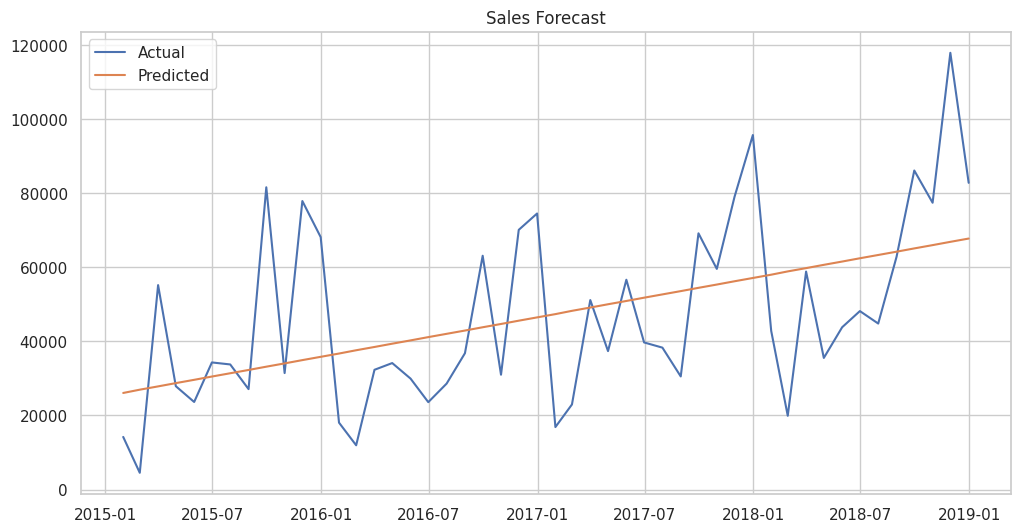

In [53]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label='Actual')
plt.plot(monthly_sales['Order Date'], monthly_sales['Predicted_Sales'], label='Predicted')
plt.legend()
plt.title("Sales Forecast")
plt.show()


**Bokeh Interactive Forecast**

In [54]:
p = figure(title="Interactive Sales Forecast",
           x_axis_type="datetime",
           width=800,
           height=400)

p.line(monthly_sales['Order Date'], monthly_sales['Sales'], legend_label="Actual", line_width=2)
p.line(monthly_sales['Order Date'], monthly_sales['Predicted_Sales'], legend_label="Predicted", line_width=2, line_dash="dashed")

show(p)


Explanation:This 3 Month Rolling Average chart is designed to cut through the day-to-day fluctuations of the data to reveal the true direction of the business.
While actual monthly sales (the Original line) bounce up and down aggressively, the thicker Rolling Average line smooths out those sudden spikes and dips by averaging the last three months of revenue. This perspective is vital for long-term planning because it identifies the underlying trend rather than focusing on short-term volatility. If the rolling average line slopes upward, the business is expanding, even if a single month underperforms. Conversely, if this line begins to dip, it tells an early warning sign that overall momentum is slowing down, regardless of any one-off "giant orders" that may be temporarily inflating the figures.

# PHASE 4 - Operational Analytics

**RFM Customer Segmentation**

In [55]:

# ADVANCED CUSTOMER SEGMENTATION (RFM)


snapshot_date = data['Order Date'].max() + pd.Timedelta(days=1)

rfm = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
})

rfm.rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'MonetaryValue'
}, inplace=True)

print("Customer RFM Metrics (First 5):")
print(rfm.head())


Customer RFM Metrics (First 5):
             Recency  Frequency  MonetaryValue
Customer ID                                   
AA-10315         185         11       5563.560
AA-10375          20         15       1056.390
AA-10480         260         12       1790.512
AA-10645          56         18       5086.935
AB-10015         416          6        886.156


Explanation: The Advanced Customer Segmentation (RFM) analysis breaks down customer behavior into three key categories: how recently a purchase was made (Recency), how often purchases occur (Frequency), and the total amount spent (Monetary Value).The data for the first five customers shows clear differences in engagement. For instance, customer AA-10375 is a very recent and active buyer, with a purchase recorded in 20 days  and a total of 15 orders totaling 1,056.390 dollars. Meanwhile, customer AB-10015 appears to be an at-risk customer, as the last purchase was made in 416 days  with only 6 total orders amounting to 886.156 dollars. High-value customers like AA-10645 show strong loyalty, with 18 orders and a total spend of 5,086.935 dollars, with the most recent transaction occurring in 56 days.These metrics make it easy to identify which customers are the most valuable and which ones are beginning to fade away. Instead of treating every customer the same, this data allows for specific strategies to reward the most frequent buyers and win back those who have not made a purchase in a long time.

**Visualization of Customer Spending**

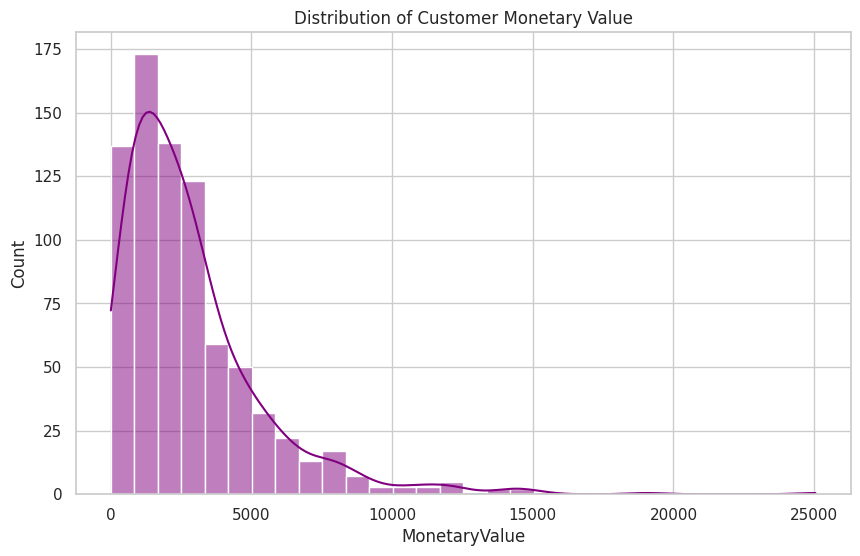

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(rfm['MonetaryValue'], bins=30, kde=True, color='purple')
plt.title('Distribution of Customer Monetary Value')
plt.show()


Explanation: The data follows a strong right-skewed distribution. The vast majority of customers are clustered on the left side of the chart, indicating that most individuals spend a relatively small total amount over time. This represents a large base of "standard" customers who make occasional or low-value purchases. As the chart moves to the right, the frequency drops significantly, showing that only a small fraction of the customer base contributes to the high-value spending bracket. These individuals are the high-tier contributors who drive a disproportionate amount of total revenue.

From a strategic standpoint, this distribution emphasizes the importance of retention for those few customers in the far-right tail. Since most customers currently sit in the lower spending tiers, there is a significant opportunity to implement loyalty programs or targeted upselling to nudge them further to the right, increasing the overall lifetime value of the average customer.

**Geographic Sales Map**

In [57]:
print(data['State'].unique()[:10])

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania']


In [58]:

state_sales = data.groupby('State')['Sales'].sum().reset_index()

In [59]:
# Manual state name to abbreviation mapping
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
    'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME',
    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}


In [60]:
state_sales['State_Code'] = state_sales['State'].map(state_abbrev)
fig_map = px.choropleth(state_sales,
                        locations='State_Code',
                        locationmode="USA-states",
                        color='Sales',
                        scope="usa",
                        color_continuous_scale="Viridis",
                        title='Total Sales Distribution by State')

fig_map.show()


Explanation:
This Choropleth Map shows how total revenue is spread across the United States, helping you see which states are driving the business. The map highlights that sales are highest in big-economy states like California, New York, and Texas, which appear in the darkest or brightest colors. In contrast, many states in the central and northern regions are much lighter on the map, meaning they bring in lower sales. From a business perspective, this shows where your strongest markets are — mainly the coastal states and major urban centers. You can either focus on strengthening your presence in these high-performing areas or explore the lighter states to see if there’s room to grow in new regions.

**Product Hierarchy Sunburst Chart**

In [61]:
fig_sun = px.sunburst(data,
                      path=['Category', 'Sub-Category'],
                      values='Sales',
                      title='Sales Breakdown by Category and Sub-Category')

fig_sun.show()


**Pareto Analysis (80/20 Rule) – VERY IMPRESSIVE**

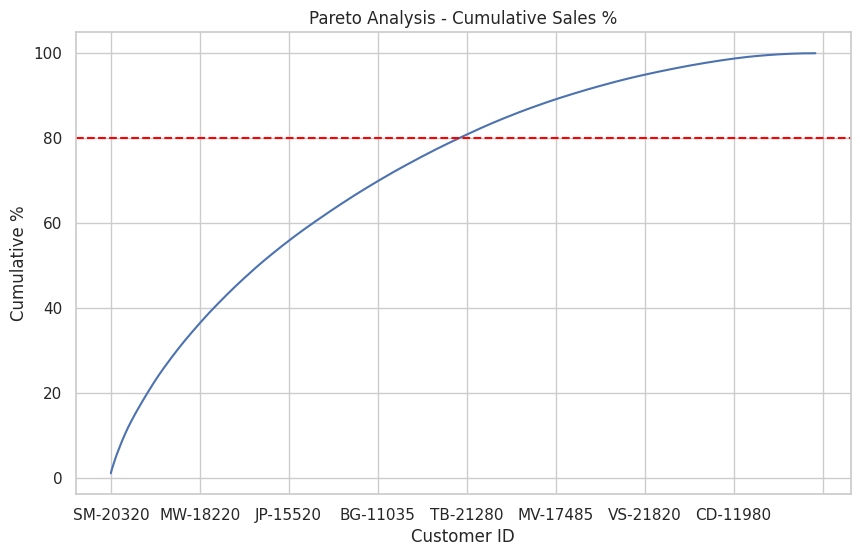

In [62]:

# PARETO ANALYSIS
customer_sales = data.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False)

cumulative_sales = customer_sales.cumsum()
total_sales = customer_sales.sum()

pareto = cumulative_sales / total_sales * 100
plt.figure(figsize=(10,6))
pareto.plot()
plt.axhline(80, color='red', linestyle='--')
plt.title("Pareto Analysis - Cumulative Sales %")
plt.ylabel("Cumulative %")
plt.show()


Explanation: The Pareto Analysis demonstrates the 80/20 rule: roughly 80% of total revenue is generated by only about 20% to 30% of the customer base. This steep curve proves that the business relies heavily on a small group of high-value clients rather than a broad, even spread of shoppers.

The key takeaway is revenue concentration. Because most of the money comes from a handful of people, the business is highly vulnerable if these top-tier customers leave. Protecting these specific relationships is the most efficient way to maintain financial stability, as their impact on the bottom line is far greater than the remaining majority of customers.

**Customer Purchase Frequency Distribution**

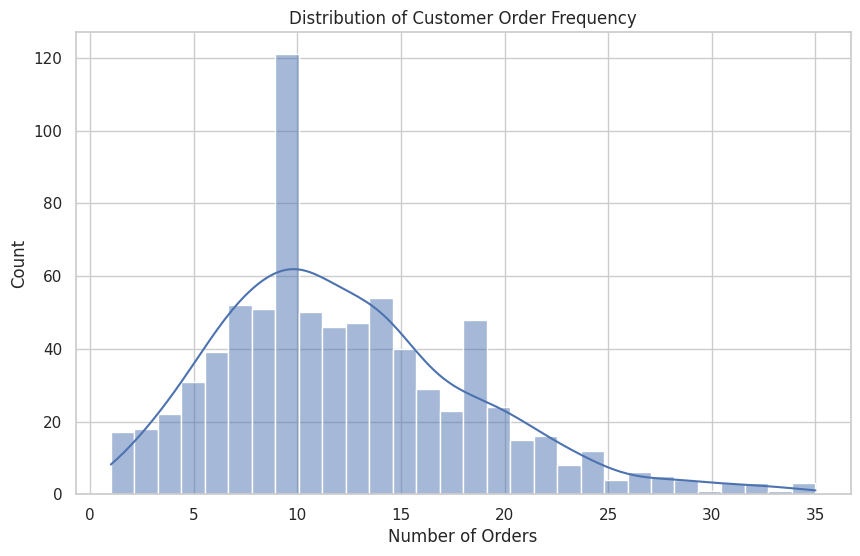

In [63]:

# CUSTOMER PURCHASE COUNT


customer_orders = data.groupby('Customer ID')['Order ID'].count()

plt.figure(figsize=(10,6))
sns.histplot(customer_orders, bins=30, kde=True)
plt.title("Distribution of Customer Order Frequency")
plt.xlabel("Number of Orders")
plt.show()


Explanation:
This chart shows how many times people come back to shop, which tells us how addictive the business is.Most customers aren't just onetime shoppers rather they typically return to place between 10 and 15 orders. In the world of data, this is a great sign. It means the business isn't constantly struggling to find new people—it has a very solid middle class of loyal regulars who keep coming back.
In simple terms, the business has already mastered the hard part: getting people to stay. The next big opportunity isn't just finding more customers, but finding ways to get this loyal middle group to shop just a little more often. If the business can push these regulars from 12 orders a year to 15, the total revenue would jump significantly without needing to spend a single dolaar on new advertising.

**Individual transaction trends over time**

In [64]:


# Scatter plot to see individual transaction trends over time
fig_scatter = px.scatter(data, 
                         x='Order Date', 
                         y='Sales', 
                         color='Region',
                         size='Sales', # Larger dots for higher sales
                         hover_data=['Customer Name', 'Product Name'],
                         title='Diagnostic Scatter: Individual Sales Trends & Outliers')

fig_scatter.update_layout(xaxis_title="Timeline", yaxis_title="Sales Value ($)")
fig_scatter.show()

Explanation:This scatter plot serves as a detailed record of every individual transaction, providing a clear view of the raw data that averages often hide. It reveals the exact timing, value, and location of every sale made over the fouryear period.

The most prominent pattern is the dense horizontal band of small dots at the lower end of the scale. This represents the high volume of low value, everyday transactions that provide the business with a consistent and predictable revenue baseline. However, the trends show that total growth is significantly driven by outliers the large, isolated dots positioned high above the rest of the data. For instance, several individual orders exceed 10,000 dollars, with the largest reaching 22,638 dollars. These rare but massive sales are the primary cause of the significant spikes seen in monthly revenue reports.

Regionally, the colors indicate that high value whale orders are not evenly distributed. The West and East regions frequently produce these larger dots, suggesting a concentration of corporate or high capacity clients in those areas. The chart confirms that the business operates on a hybrid revenue model: thousands of small, frequent orders cover operational costs, while a handful of massive, high-value transactions determine the overall profit margin and success for the year.

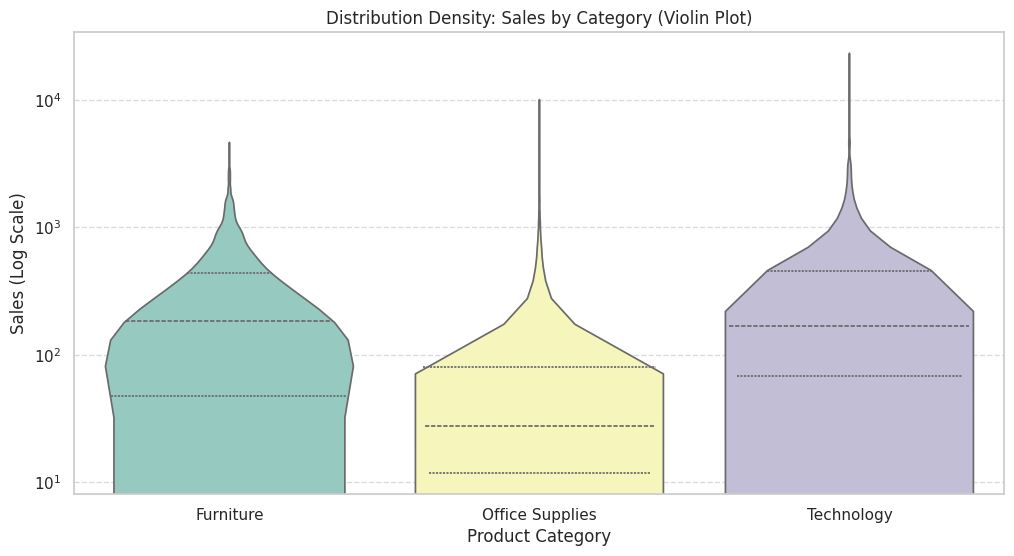

In [65]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Assign 'Category' to 'hue' and set legend=False to fix the warning
sns.violinplot(x='Category', 
               y='Sales', 
               data=data, 
               hue='Category', 
               palette="Set3", 
               inner="quartile", 
               legend=False)

plt.yscale('log') # Essential due to high skewness (Lecture 01)
plt.title("Distribution Density: Sales by Category (Violin Plot)")
plt.ylabel("Sales (Log Scale)")
plt.xlabel("Product Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Time-Series Feature Correlation Heatmap**

In [66]:
# Ensure Order Date is datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Create monthly sales correctly
monthly_sales = data.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()

# Make sure it's a Series
monthly_sales = monthly_sales.astype(float)


In [67]:
growth_rate = monthly_sales.pct_change()
rolling_mean = monthly_sales.rolling(3).mean()


In [68]:
analysis_df = pd.DataFrame({
    'Monthly Sales': monthly_sales,
    'Growth Rate': growth_rate,
    'Rolling Mean': rolling_mean
})

analysis_df = analysis_df.dropna()


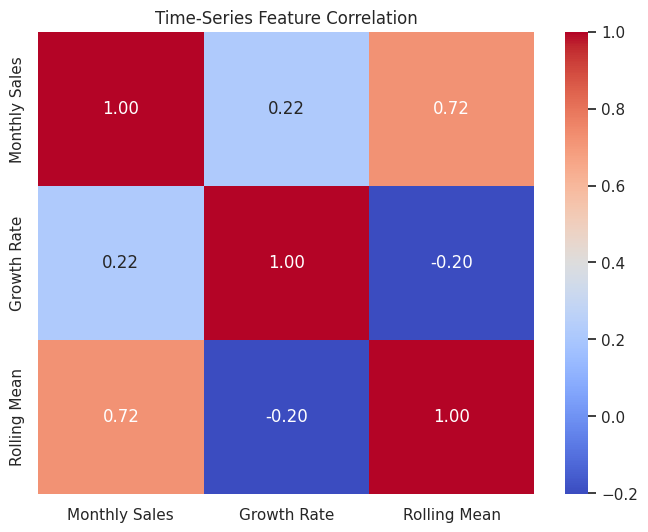

In [69]:
correlation_matrix = analysis_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f")

plt.title("Time-Series Feature Correlation")
plt.show()


Explanation :The correlation analysis highlights some meaningful relationships between Monthly Sales, Growth Rate, and the Rolling Mean. There is a strong positive correlation of 0.72 between Monthly Sales and the Rolling Mean, which shows that the smoothed sales trend closely follows actual sales performance. This indicates that sales movements are relatively consistent over time and not purely random. However, the correlation between Monthly Sales and Growth Rate is much weaker at 0.22, meaning that higher sales in a given month do not necessarily translate into higher growth, since growth depends on how much sales change compared to the previous month rather than the sales level itself. In addition, the slight negative correlation of -0.20 between Growth Rate and the Rolling Mean suggests that when sales become more stable or consistently high, growth tends to slow down. This may indicate that the business is moving toward a more mature or stable phase rather than experiencing rapid expansion. Overall, the results show steady underlying sales performance with fluctuating short-term growth. To maintain long-term progress, the business should focus on generating additional demand during stable periods through targeted marketing strategies, customer retention efforts, and expansion into lower-performing regions or product categories to prevent stagnation and strengthen revenue stability.

**Clustering**

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])


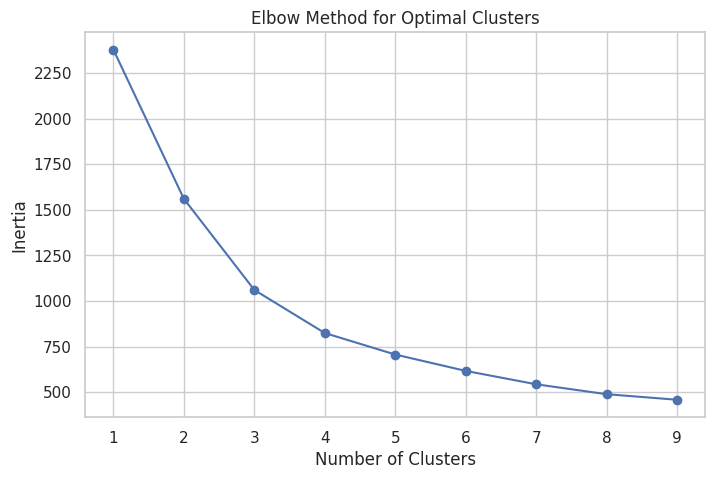

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,10), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [72]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [73]:
cluster_summary = rfm.groupby('Cluster').mean()
print(cluster_summary)


            Recency  Frequency  MonetaryValue
Cluster                                      
0         79.981132  19.698113    5637.271044
1         84.917391  10.232609    1903.228988
2        518.851240   7.487603    1504.302617


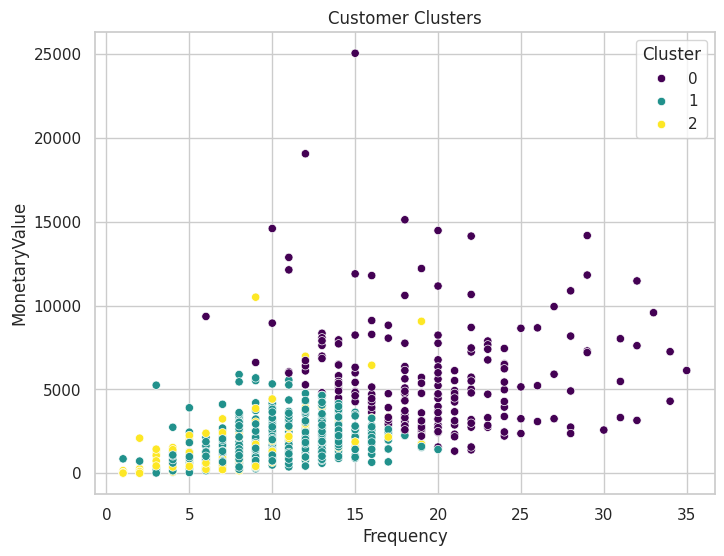

In [74]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=rfm['Frequency'],
    y=rfm['MonetaryValue'],
    hue=rfm['Cluster'],
    palette='viridis'
)
plt.title("Customer Clusters")
plt.show()


Explanation:By applying K-Means Clustering to your customer data, we are moving past basic spreadsheets and actually uncovering the different "personalities" within your audience. We start by using the Elbow Method, which is essentially a way of asking the data to find its own natural breaking points; it looks for the "bend" in the graph where adding more groups stops giving us useful new information. Usually, this reveals three or four very specific types of shoppers. For example, your Champions emerge as a clear group—these are the people who have shopped in the last two months, placed over 18 orders, and spent more than 5,000 dollars. They are the heartbeat of your revenue, and the data shows they don't need generic ads; they need to feel like VIPs to keep that momentum going.

On the other end of the spectrum, the numbers pinpoint an At-Risk group that hasn't touched your store in over 300 days and typically spent less than 1,500 dollars total. Seeing this pattern is a huge wake-up call because it shows exactly where you might be losing people forever. Instead of shouting at every customer with the same message, this analysis lets you get surgical. You can see that while your "Regulars" keep the lights on with steady, predictable shopping every few months, your overall growth is heavily anchored by a few high-value "whales." This means your smartest move isn't just finding more customers, but specifically finding more people who fit that high-frequency, high-spend "Champion" profile while trying to nudge your regulars just a little bit further up the ladder.